In [1]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
ds= pd.read_csv("Social_Network_Ads.csv")
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
ds.duplicated().sum()

0

In [5]:
ds.drop_duplicates(inplace =True)

In [7]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#spliting dataset into independent and dependent variable

x= ds[["Age","EstimatedSalary"]]
y= ds[["Purchased"]]

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [10]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [11]:
# spliting dataset into Training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=0)


In [12]:
# Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
cls =RandomForestClassifier(n_estimators =10,criterion='entropy',random_state=0)
cls.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [13]:
# predict for my input

result=cls.predict(sc.transform([[23,500000]]))
result

array([1], dtype=int64)

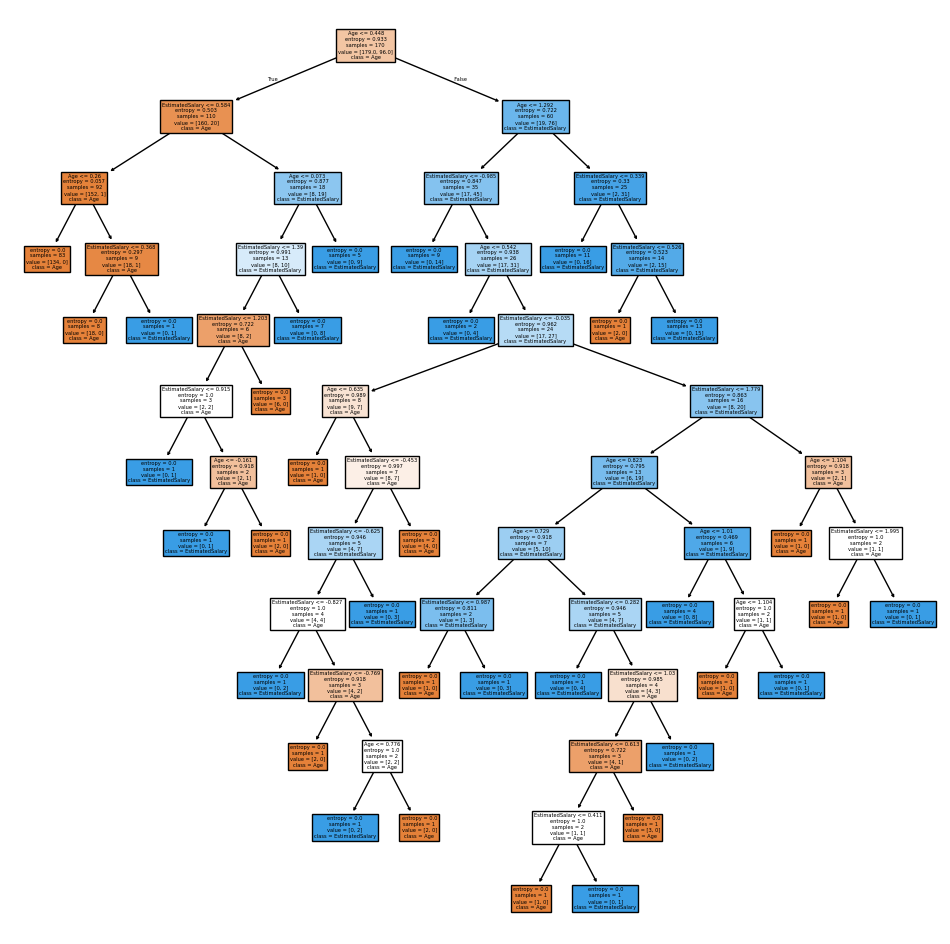

In [18]:
#plot graph for Random Forest classifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plot_tree(cls.estimators_[0], filled=True, feature_names =['Age', 'EstimatedSalary'],class_names =['Age', 'EstimatedSalary'])
plt.show()

In [19]:
# checking accuracy

from sklearn.metrics import accuracy_score

#predict the label for the test data
y_pre =cls.predict(x_test)

# calculate
accuracy =accuracy_score(y_test,y_pre)
print(f"Accuracy : {accuracy*100:.2f}")



Accuracy : 89.13


In [20]:
# user input

age =float(input("Enter Age :"))
salary =float(input("Enter salary :"))

myinput= pd.DataFrame(sc.transform([[age,salary]]),columns =["Age","EstimatedSalary"])
result=cls.predict(myinput)

if result[0]==1:
    print("Prediction : User will purchased plan")
else:
    print("Prediction : User will not purchased plan")

Enter Age : 23
Enter salary : 200000


Prediction : User will purchased plan
